In [1]:
!date

Thu 24 Sep 2020 13:11:09 EDT


In [2]:
!which python

/Users/chuck/.virtualenvs/residential_testbed-_oHoZWcN/bin/python


In [3]:
%load_ext autotime

In [4]:
import numpy as np
import matplotlib.pyplot as plt

time: 2.11 s


In [5]:
# stole these from an actual model
model_params = {'site_air_temp_lb0': -0.07705090827283811,
 'site_air_temp_lb1': 0.0868922241344876,
 'site_direct_solar_lb0': -0.0001144392615515244,
 'site_direct_solar_lb1': 0.0001809371597119025,
 'sensible_heating_bool_lb0': 0.668022493564159,
 'sensible_heating_bool_lb1': -0.1212789391296738,
 'sensible_cooling_bool_lb0': 0.0,
 'sensible_cooling_bool_lb1': 0.0,
 'zone_mean_air_temp_lb0': 0.9534713323209267,
 'zone_mean_air_temp_lb1': 0.014742719358824985,
 'intercept': 0.40977951}

time: 590 µs


In [6]:
ar_order = 2 
history_lb = ar_order -1 # this gets used a fair bit 
horizon = 72 # prediction horizion

time: 6.44 ms


In [7]:
# real tout for 6 hours
tout = [0.5, -0.09999999999999988, -0.6999999999999998, -1.3, -1.9, -2.5, -3.1, -3.7, -4.299999999999999, -4.9, -5.499999999999999, -6.1, -5.958333333333332, -5.816666666666666, -5.674999999999999, -5.533333333333334, -5.3916666666666675, -5.25, -5.1083333333333325, -4.966666666666667, -4.825, -4.683333333333334, -4.541666666666667, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.4, -4.541666666666666, -4.683333333333334, -4.825, -4.966666666666667, -5.1083333333333325, -5.25, -5.391666666666668, -5.533333333333332, -5.674999999999999, -5.816666666666666, -5.958333333333332, -6.1, -6.008333333333333, -5.916666666666666, -5.8249999999999975, -5.7333333333333325, -5.6416666666666675, -5.55, -5.458333333333332, -5.366666666666667, -5.275, -5.183333333333334, -5.091666666666667, -5.0, -5.091666666666667, -5.183333333333334, -5.275, -5.366666666666667, -5.458333333333332, -5.55, -5.641666666666668, -5.7333333333333325, -5.8249999999999975, -5.916666666666666, -6.008333333333333, -6.1, -6.1916666666666655]

# no solar for now
solar = [0 for x in range(len(tout))]

# some made up setpoints with transitions
heat_stp = [19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 16.67, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]

cool_stp = [23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89, 23.89]

time: 3.23 ms


Text(0, 0.5, 'Temp [oC]')

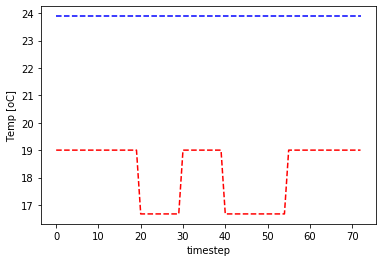

time: 372 ms


In [8]:
plt.plot(heat_stp,'--r')
plt.plot(cool_stp, '--b')
plt.xlabel('timestep')
plt.ylabel('Temp [oC]')

In [9]:
# some made up intial conditions in the form [t, t+1]
temp_init = [22.0, 22.8]
heat_init = [0,0]
cool_init = [0,0]
# this means our first temperature prediction is for t+2

time: 558 µs


In [10]:
# what is the natural decay curve?
t_natural_decay = np.zeros(horizon+history_lb)
heat_state = np.zeros(horizon+history_lb)
cool_state = np.zeros(horizon+history_lb)

t_natural_decay[:2] = temp_init
heat_state[:2] = heat_init
heat_state[:2] = cool_init
    
for t in range(history_lb, horizon):                      
    t_natural_decay[t+1] = model_params['zone_mean_air_temp_lb0']*t_natural_decay[t] + model_params['zone_mean_air_temp_lb1']*t_natural_decay[t-1] \
        + model_params['sensible_heating_bool_lb0']*heat_state[t] + model_params['sensible_heating_bool_lb1']*heat_state[t-1] + model_params['sensible_cooling_bool_lb0']*cool_state[t] \
        + model_params['sensible_cooling_bool_lb1']*cool_state[t-1] + model_params['site_air_temp_lb0']*tout[t] + model_params['site_air_temp_lb1']*tout[t-1] \
        + model_params['site_direct_solar_lb0']*solar[t] + model_params['site_direct_solar_lb1']*solar[t-1] + model_params['intercept']
    
    if t<10:
        print(model_params['site_air_temp_lb0']*tout[t] + model_params['site_air_temp_lb1']*tout[t-1] \
            + model_params['site_direct_solar_lb0']*solar[t] + model_params['site_direct_solar_lb1']*solar[t-1] + model_params['intercept'])

0.46093071289452764
0.45502592337753794
0.44912113386054825
0.4432163443435585
0.43731155482656886
0.43140676530957917
0.42550197579258947
0.41959718627559967
0.4136923967586102
time: 2.64 ms


Text(0.5, 0, 'timestep')

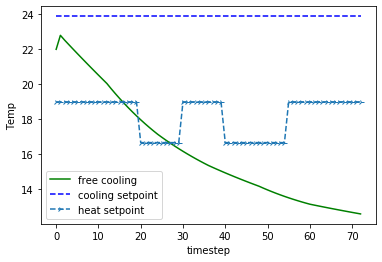

time: 366 ms


In [235]:
plt.plot(t_natural_decay,'-g', label="free cooling")
plt.plot(cool_stp, '--b', label="cooling setpoint")
plt.plot(heat_stp,'--4', label='heat setpoint')
plt.legend()
plt.ylabel('Temp')
plt.xlabel('timestep')

# Ok lets see how this goes with MCTS

- modified from the pip mcts package

In [12]:
import time
import math
import random
from collections import deque
from copy import deepcopy



time: 541 µs


In [207]:
ar_size = 2

# def random_policy(state):
#     while not state.is_terminal():
#         try:
#             action = random.choice(state.get_possible_actions())
#         except IndexError:
#             raise Exception("Non-terminal state has no possible actions: " + str(state))
#         state = state.take_action(action)
#     return state.get_reward()


class Node():
    def __init__(self, state, parent):
        self.state = state
        self.is_terminal = state.is_terminal()
        self.is_fully_expanded = self.is_terminal
        
        self.parent = parent
        self.creation_action = None
        
        self.num_visits = 0
        self.total_reward = 0
        self.children = {}
        
        
    def __str__(self):
        if self.parent != None:
            parent_name = self.parent.state.depth
        else:
            parent_name = 'root'
        return f"Node {self.state.depth} - Parent {parent_name} - Action {self.creation_action}"
    
    def name(self):
        if self.parent != None:
            parent_name = self.parent.state.depth
        else:
            parent_name = 'root'
        return f"{parent_name}/{self.state.depth}-{self.creation_action}"
    
        
class home_state():
    def __init__(self, ar_order, coefficients, tout, solar, tsp_heat, tsp_cool):
        
        self.ar_order = ar_order
        self.model_coefficients = coefficients
        
        self.tin_history = deque(maxlen=self.ar_order)
        
        # this will contain lb1 and lb0
        self.heat_history = deque(maxlen=self.ar_order)
        self.cool_history = deque(maxlen=self.ar_order)
        
        self.solar = solar
        self.tout = tout
        self.tsp_heat = tsp_heat
        self.tsp_cool = tsp_cool
        
        self.depth = 0
    
    def intialize_caches(self, heat_hist, cool_hist, tin_hist):
        self.tin_history.extend(tin_hist)
        self.heat_history.extend(heat_hist)
        self.cool_history.extend(cool_hist)
        
        
    def get_possible_actions(self):
        
        possibleActions = [1]
        # tout temperature lockout
        if self.tout[self.depth] >=10:
            possibleActions.append(2)
        else:
            possibleActions.append(3)
        return possibleActions
    
#     def take_action(self, action):
#         """
#         This is an update step..
#         """
#         if action == 3:
#             _heat = 1
#             _cool = 0           
#         elif action == 2:
#             _heat = 0
#             _cool = 1            
#         else:
#             _heat = 0
#             _cool = 0
        
#         self.heat_history.append(_heat)
#         self.cool_history.append(_cool)
        
#         tin_p1 = self._predict_temp()
#         self.tin_history.append(tin_p1)
    
        
#         new_state = deepcopy(self)
#         # we have moved a step deeper in our prediction
#         new_state.depth += 1 
#         return new_state
    
    def take_action(self, action):
        """
        This is an update step..
        """
        if type(action) != int:
            action = action[0]
        if action == 3:
            _heat = 1
            _cool = 0           
        elif action == 2:
            _heat = 0
            _cool = 1            
        else:
            _heat = 0
            _cool = 0
        
        new_state = deepcopy(self)
        new_state.heat_history.append(_heat)
        new_state.cool_history.append(_cool)
        
        # we have moved a step deeper in our prediction
        new_state.depth += 1 

        tin_p1 = new_state._predict_temp()
        new_state.tin_history.append(tin_p1)
        #print(f"Action: {action} heat {_heat} cool {_cool} Newstate heat {new_state.heat_history} cool{new_state.cool_history}")
        return new_state
    
    def _predict_temp(self):
        t = self.depth
        #if t==1:
        #    print("*"*50)

        tin_p1 = self.model_coefficients["intercept"]# add this back later[0]
            
        for lb in range(0, self.ar_order):
            tin_p1 += (
                self.model_coefficients[f"zone_mean_air_temp_lb{lb}"] * self.tin_history[-(lb+1)]
            )
            tin_p1 += (
                self.model_coefficients[f"sensible_heating_bool_lb{lb}"]
                * self.heat_history[-(lb+1)]
            )
            tin_p1 += (
                self.model_coefficients[f"sensible_cooling_bool_lb{lb}"]
                * self.cool_history[-(lb+1)]
            )
            tin_p1 += (
                self.model_coefficients[f"site_air_temp_lb{lb}"]
                * self.tout[t - lb]
            )
            tin_p1 += (
                self.model_coefficients[f"site_direct_solar_lb{lb}"]
                * self.solar[t - lb]
            )
            
        #if t <11:
        #   print(f"Time/depth {t} Tsp {self.tsp_heat[t]} T-n {self.tin_history} Aux {self.heat_history[-1]} T+1 {tin_p1}")
        
        return tin_p1
    
    
    def is_terminal(self):
        """
        Termination is to be based on the depth of the tree which should be the prediction horizon starting from the root
        """
        pred_horizon = len(self.tout)
        if self.depth == pred_horizon - 1 :
            return True
        else:
            return False
        
    def get_reward(self):
        t = self.depth
        #print(t, self.tsp_heat[t])
        heat_penalty = np.maximum(self.tsp_heat[t] - self.tin_history[-1],0)
        cool_penalty = np.maximum(self.tin_history[-1] - self.tsp_cool[t],0)
        
        runtime_penalty = 0
        if (self.heat_history[-1]) > 0 or (self.cool_history[-1])>0:
            runtime_penalty = 1
        #print(self.tsp_heat[t] - self.tin_history[-1])
        #print(self.tin_history[-1] - self.tsp_cool[t])
        #print(t, self.tsp_heat[t], heat_penalty, cool_penalty, runtime_penalty)
        return (heat_penalty + cool_penalty + runtime_penalty*100) * -1

time: 5.28 ms


In [208]:

def random_policy(state):
    discount = 0.8
    debug_list = []
    debug_action_list = []
    reward_list = []
    total_reward = 0
    action = None
    while not state.is_terminal():
        try:
            #action = random.choice(state.get_possible_actions())
            
            action = random.choices(state.get_possible_actions(),weights=[0.9,0.1],k=1)
            
            #action = np.min(state.get_possible_actions())
            #action = 1
            
        except IndexError:
            raise Exception("Non-terminal state has no possible actions: " + str(state))
        debug_action_list.append(action)
        debug_list.append(state.tin_history[-1])
        
        state = state.take_action(action)
        reward_list.append(state.get_reward())
        total_reward += state.get_reward()
    l = [None] * 4
    l[-len(debug_action_list):] = debug_action_list
    
    print(f"Action list: {l}, last_action: {action} reward: {state.get_reward()}, terminal {state.is_terminal()}, action_cache: {state.heat_history}")
    #print(len(debug_list), debug_list)
    #print("Total reward", total_reward)
    return state.get_reward() # this reward will only be for the last state...not the accumulated stuff...hmmm
    #return total_reward
    #return np.sum([x*discount**i for i,x in enumerate(reward_list)])

# class Node():
#     def __init__(self, state, parent):
#         self.state = state
#         self.is_terminal = state.is_terminal()
#         self.is_fully_expanded = self.is_terminal
#         self.parent = parent
#         self.num_visits = 0
#         self.total_reward = 0
#         self.children = {}
        

class mcts():
    def __init__(self, time_limit=None, iteration_limit=None, exploration_constant=1 / math.sqrt(2),
                 rollout_policy=random_policy):
        
        if time_limit != None:
            if iteration_limit != None:
                raise ValueError("Cannot have both a time limit and an iteration limit")
            # time taken for each MCTS search in milliseconds
            self.time_limit = time_limit
            self.limit_type = 'time'
        else:
            if iteration_limit == None:
                raise ValueError("Must have either a time limit or an iteration limit")
            # number of iterations of the search
            if iteration_limit < 1:
                raise ValueError("Iteration limit must be greater than one")
            self.search_limit = iteration_limit
            self.limit_type = 'iterations'
        self.exploration_constant = exploration_constant
        self.rollout = rollout_policy

    def search(self, initial_state):
        """ Search for the best next action """
        
        # intialize the root 
        self.root = Node(initial_state, None)
        
        # bound by either a time limit or an iteration limit
        if self.limit_type == 'time':
            time_limit = time.time() + self.time_limit / 1000
            while time.time() < time_limit:
                self.execute_round()
        else:
            for i in range(self.search_limit):
                self.execute_round()

        best_child = self.get_best_child(self.root, 0)
        return self.get_action(self.root, best_child)

    def execute_round(self):
        # start at the top and make a selection.. 
        node = self.select_node(self.root)
        
        # make the rollout based on the node we just selected..
        reward = self.rollout(node.state) # our rollout policy is random..
        
        self.backpropogate(node, reward)

    def select_node(self, node):
        while not node.is_terminal:
            if node.is_fully_expanded:
                # if the node is full expanded take the best action
                node = self.get_best_child(node, self.exploration_constant)
            else:
                # if not expanded make an expansion move
                return self.expand(node)
        return node

    def expand(self, node):
        actions = node.state.get_possible_actions()
        for action in actions:
            if action not in node.children:
                newNode = Node(node.state.take_action(action), node)
                node.children[action] = newNode
                node.creation_action = action
                if len(actions) == len(node.children):
                    node.is_fully_expanded = True
                return newNode

        raise Exception("Should never reach here")

    def backpropogate(self, node, reward):
        while node is not None:
            node.num_visits += 1
            node.total_reward += reward
            node = node.parent

    def get_best_child(self, node, exploration_value):
        best_value = float("-inf")
        best_nodes = []
        for child in node.children.values():
            node_value = child.total_reward / child.num_visits + exploration_value * math.sqrt(
                2 * math.log(node.num_visits) / child.num_visits)
            if node_value > best_value:
                best_value = node_value
                best_nodes = [child]
            elif node_value == best_value:
                best_nodes.append(child)
        return random.choice(best_nodes)

    def get_action(self, root, best_child):
        for action, node in root.children.items():
            if node is best_child:
                return action

time: 4.8 ms


In [209]:
h = home_state(2, model_params, tout[:4], solar[:4],heat_stp[:4] , cool_stp[:4])
h.intialize_caches(heat_init, cool_init, temp_init)

#tree = mcts(time_limit=1000*60*3) # 5 minute limit
tree = mcts(iteration_limit=25)

action = tree.search(initial_state=h)

Action list: [None, None, [1], [1]], last_action: [1] reward: -0.0, terminal True, action_cache: deque([0, 0], maxlen=2)
Action list: [None, None, [1], [1]], last_action: [1] reward: -0.0, terminal True, action_cache: deque([0, 0], maxlen=2)
Action list: [None, None, None, [1]], last_action: [1] reward: -0.0, terminal True, action_cache: deque([0, 0], maxlen=2)
Action list: [None, None, None, [1]], last_action: [1] reward: -0.0, terminal True, action_cache: deque([0, 0], maxlen=2)
Action list: [None, None, None, [1]], last_action: [1] reward: -0.0, terminal True, action_cache: deque([1, 0], maxlen=2)
Action list: [None, None, None, [1]], last_action: [1] reward: -0.0, terminal True, action_cache: deque([1, 0], maxlen=2)
Action list: [], last_action: None reward: -0.0, terminal True, action_cache: deque([0, 0], maxlen=2)
Action list: [], last_action: None reward: -0.0, terminal True, action_cache: deque([1, 0], maxlen=2)
Action list: [], last_action: None reward: -0.0, terminal True, ac

In [210]:
action

3

time: 1.17 ms


In [211]:
tree.root.children

{1: <__main__.Node at 0x7fcd51906be0>, 3: <__main__.Node at 0x7fcd51906eb8>}

time: 1.8 ms


In [212]:
tree.root.children[3].total_reward/tree.root.children[3].num_visits

-11.11111111111111

time: 1.43 ms


In [213]:
tree.root.children[1].total_reward,tree.root.children[1].num_visits

(-200.0, 7)

time: 1.35 ms


In [214]:
tree.root.children[3].total_reward,tree.root.children[3].num_visits

(-200.0, 18)

time: 1.41 ms


In [215]:
len(h.tout)

4

time: 1.19 ms


In [229]:
def get_values(tree,node):
    
    exploration_constant=1 
    for child in node.children.values():
        if child != None:
            node_value = child.total_reward / child.num_visits + exploration_constant * math.sqrt(
                2 * math.log(node.num_visits) / child.num_visits)
            print("Action:",tree.get_action(node, child), "Node Val:",node_value, child.total_reward, child.num_visits)

time: 852 µs


In [230]:

child = tree.root
temps = []
actions = []
while len(child.children) >0:
    temps.append(child.state.tin_history[-1])
    
    best_child = tree.get_best_child(child, 0)
    best_a = tree.get_action(child, best_child)
    actions.append(best_a)
    print("*"*51)
    print(child.state.depth, best_a, child.state.tin_history, child.state.get_reward())
    print(get_values(tree, child))
    
    child = child.children[best_a]
    print(child.name(), child.state.get_reward())
    #child = child.
    
    

***************************************************
0 3 deque([22.0, 22.8], maxlen=2) -0.0
Action: 1 Node Val: -27.612429714752924 -200.0 7
Action: 3 Node Val: -10.513070251779743 -200.0 18
None
0/1-3 -100.0
***************************************************
1 3 deque([22.8, 23.192439409269966], maxlen=2) -100.0
Action: 1 Node Val: -31.945199872435534 -100.0 3
Action: 3 Node Val: -6.500276213224133 -100.0 14
None
1/2-3 -100.0
***************************************************
2 1 deque([23.192439409269966, 23.451229582522235], maxlen=2) -100.0
Action: 1 Node Val: 0.6632065200744107 0.0 12
Action: 3 Node Val: -97.70258522264035 -100.0 1
None
2/3-None -0.0
time: 3.66 ms


In [233]:
child.name()

'2/3-None'

time: 2.03 ms


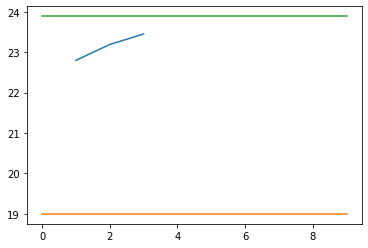

time: 117 ms


In [234]:
plt.plot(np.arange(1,len(temps)+1),temps)
plt.plot(heat_stp[:10])
plt.plot(cool_stp[:10])

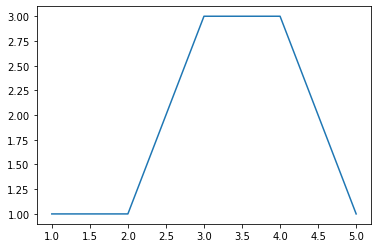

time: 124 ms


In [117]:
plt.plot(np.arange(1,len(temps)+1),actions)

## debug temp modelling

In [290]:
class dummy_model():
    def __init__(self, ar_order, coefficients, tout, solar, tsp_heat, tsp_cool):
        
        self.ar_order = ar_order
        self.model_coefficients = coefficients
        
        self.tin_history = deque(maxlen=self.ar_order)
        
        # this will contain lb1 and lb0
        self.heat_history = deque(maxlen=self.ar_order)
        self.cool_history = deque(maxlen=self.ar_order)
        
        self.solar = solar
        self.tout = tout
        self.tsp_heat = tsp_heat
        self.tsp_cool = tsp_cool
        
        self.depth = 0
        
    
    def intialize_caches(self, heat_hist, cool_hist, tin_hist):
        self.tin_history.extend(tin_hist)
        self.heat_history.extend(heat_hist)
        self.cool_history.extend(cool_hist)
        
    def _predict_temp(self):
        tin_p1 = self.model_coefficients["intercept"]# add this back later[0]
        t = self.depth 
        for lb in range(0, self.ar_order):
            tin_p1 += (
                self.model_coefficients[f"zone_mean_air_temp_lb{lb}"] * self.tin_history[-(lb+1)]
            )
            tin_p1 += (
                self.model_coefficients[f"sensible_heating_bool_lb{lb}"]
                * self.heat_history[-(lb+1)]
            )
            tin_p1 += (
                self.model_coefficients[f"sensible_cooling_bool_lb{lb}"]
                * self.cool_history[-(lb+1)]
            )
            tin_p1 += (
                self.model_coefficients[f"site_air_temp_lb{lb}"]
                * self.tout[t - lb]
            )
            tin_p1 += (
                self.model_coefficients[f"site_direct_solar_lb{lb}"]
                * self.solar[t - lb]
            )
#             print(lb, self.model_coefficients[f"zone_mean_air_temp_lb{lb}"], self.model_coefficients[f"sensible_heating_bool_lb{lb}"],
#                   self.model_coefficients[f"sensible_cooling_bool_lb{lb}"],
#                   self.model_coefficients[f"site_air_temp_lb{lb}"],
#                   self.model_coefficients[f"site_direct_solar_lb{lb}"]
#                  )
        #self.depth += 1 
        return tin_p1

time: 2.11 ms


In [291]:
h2 = dummy_model(2, model_params, tout, solar, heat_stp, cool_stp)
h2.intialize_caches(heat_init, cool_init, temp_init)

time: 455 µs


In [292]:
h2.depth

0

time: 1.35 ms


In [293]:
t_list = []
for _ in range(72):
    print(h2.tin_history)
    h2.depth+=1 
    t_ = h2._predict_temp()
    t_list.append(t_)
    h2.tin_history.append(t_)

deque([22.0, 22.8], maxlen=2)
deque([22.8, 22.524416915705807], maxlen=2)
deque([22.524416915705807, 22.267545731128784], maxlen=2)
deque([22.267545731128784, 22.0126587869465], maxlen=2)
deque([22.0126587869465, 21.759939623383225], maxlen=2)
deque([21.759939623383225, 21.50931662959422], maxlen=2)
deque([21.50931662959422, 21.26072423257396], maxlen=2)
deque([21.26072423257396, 21.01409885460291], maxlen=2)
deque([21.01409885460291, 20.769378909423708], maxlen=2)
deque([20.769378909423708, 20.526504738997], maxlen=2)
deque([20.526504738997, 20.28541855314364], maxlen=2)
deque([20.28541855314364, 20.046064371062766], maxlen=2)
deque([20.046064371062766, 19.75124187437886], maxlen=2)
deque([19.75124187437886, 19.468002530547427], maxlen=2)
deque([19.468002530547427, 19.19498963710322], maxlen=2)
deque([19.19498963710322, 18.931898138106426], maxlen=2)
deque([18.931898138106426, 18.678417169979994], maxlen=2)
deque([18.678417169979994, 18.434245835860818], maxlen=2)
deque([18.4342458358

Text(0.5, 0, 'timestep')

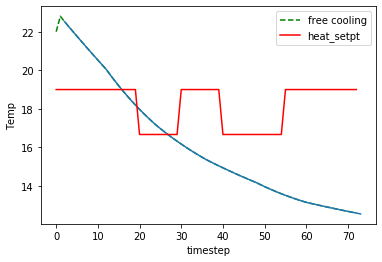

time: 207 ms


In [294]:
plt.plot(t_natural_decay,'--g', label="free cooling")
plt.plot(np.arange(2,74), t_list)
plt.plot(heat_stp,label='heat_setpt',color='red')
plt.legend()
plt.ylabel('Temp')
plt.xlabel('timestep')

In [282]:
len(solar)

73

time: 1.33 ms


In [277]:
model_params

{'site_air_temp_lb0': -0.07705090827283811,
 'site_air_temp_lb1': 0.0868922241344876,
 'site_direct_solar_lb0': -0.0001144392615515244,
 'site_direct_solar_lb1': 0.0001809371597119025,
 'sensible_heating_bool_lb0': 0.668022493564159,
 'sensible_heating_bool_lb1': -0.1212789391296738,
 'sensible_cooling_bool_lb0': 0.0,
 'sensible_cooling_bool_lb1': 0.0,
 'zone_mean_air_temp_lb0': 0.9534713323209267,
 'zone_mean_air_temp_lb1': 0.014742719358824985,
 'intercept': 0.40977951}

time: 3.66 ms


In [143]:
np.sum([x*10**i for i,x in enumerate(np.arange(1,10))])

987654321

time: 1.44 ms


In [166]:
random.choices(population=[['a','b'], ['b','a'], ['c','b']],weights=[0.2, 0.2, 0.6],k=1)

[['c', 'b']]

time: 1.63 ms


In [183]:
random.choices([1,2,3],weights=[0.9],k=1)

ValueError: The number of weights does not match the population

time: 21.5 ms


In [47]:
temp = np.arange(3,8)
l = [None] * 10
l[-len(temp):] = temp

l

[None, None, None, None, None, 3, 4, 5, 6, 7]

time: 3.28 ms
